In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Company profile (replicated per row)

-company_id (int), company_size (Small/Medium/Large + _cat),

-industry (7 categories + _cat),

-customer_tier (Basic/Plus/Enterprise + _cat),

-org_users (int): active user seats (Large up to ~10,000)

Context

-region (AMER/EMEA/APAC + _cat)

-past_30d_tickets (int), past_90d_incidents (int)

Product & channel

-product_area (auth, billing, mobile, data_pipeline, analytics, notifications + _cat)

-booking_channel (web, email, chat, phone + _cat)

-reported_by_role (support, devops, product_manager, finance, c_level + _cat)

Impact & flags

-customers_affected (int, heavy-tailed)

-error_rate_pct (float, 0–100; sometimes 0.0 as “unmeasured”)

-downtime_min (int, 0 when only degraded)

-payment_impact_flag, security_incident_flag, data_loss_flag, has_runbook (0/1)

Text proxy

-customer_sentiment (negative/neutral/positive + _cat with 0 = missing)

-description_length (int, 20–2000)

Target

-priority (low/medium/high + priority_cat = 1/2/3)

In [42]:
data = pd.read_csv('Support_tickets.csv')

In [82]:
data.head() #head of dataset

ticket_id  day_of_week_num  company_size_cat  industry_cat  \
0  1000000000                3                 1             7   
1  1000000001                6                 1             5   
2  1000000002                1                 1             4   
3  1000000003                3                 1             7   
4  1000000004                1                 1             2   

   customer_tier_cat  org_users  region_cat  past_30d_tickets  \
0                  1        126           3                 2   
1                  1        101           1                 2   
2                  1         71           3                 3   
3                  2        100           1                 2   
4                  2        332           1                 5   

   past_90d_incidents  product_area_cat  ...  error_rate_pct  downtime_min  \
0                   0                 3  ...        5.451201             6   
1                   3                 5  ...        2.495538             2   
2                   1                 6  ...        3.328402             0   
3                   2                 5  ...        2.931906            16   
4                   1                 5  ...        3.255222             6   

   payment_impact_flag  security_incident_flag  data_loss_flag  has_runbook  \
0                    0                       0               0            0   
1                    0                       0               0            0   
2                    0                       0               0            1   
3                    0                       0               0            1   
4                    0                       0               0            0   

   customer_sentiment_cat  description_length  priority  priority_cat  
0                       2                 227       1.0             1  
1                       2                 461       1.0             1  
2                       3                 306       1.0             1  
3                       2                 363       2.0             2  
4                       2                 442       1.0             1  

[5 rows x 23 columns]

In [44]:
data.info() #info() of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ticket_id               50000 non-null  int64  
 1   day_of_week             50000 non-null  object 
 2   day_of_week_num         50000 non-null  int64  
 3   company_id              50000 non-null  int64  
 4   company_size            50000 non-null  object 
 5   company_size_cat        50000 non-null  int64  
 6   industry                50000 non-null  object 
 7   industry_cat            50000 non-null  int64  
 8   customer_tier           50000 non-null  object 
 9   customer_tier_cat       50000 non-null  int64  
 10  org_users               50000 non-null  int64  
 11  region                  50000 non-null  object 
 12  region_cat              50000 non-null  int64  
 13  past_30d_tickets        50000 non-null  int64  
 14  past_90d_incidents      50000 non-null

In [45]:
data.drop(columns=["day_of_week","company_id","company_size","industry","customer_tier","region","product_area",
                   "booking_channel","reported_by_role","customer_sentiment"],axis=1,inplace=True)

In [46]:
data.head()

ticket_id  day_of_week_num  company_size_cat  industry_cat  \
0  1000000000                3                 1             7   
1  1000000001                6                 1             5   
2  1000000002                1                 1             4   
3  1000000003                3                 1             7   
4  1000000004                1                 1             2   

   customer_tier_cat  org_users  region_cat  past_30d_tickets  \
0                  1        126           3                 2   
1                  1        101           1                 2   
2                  1         71           3                 3   
3                  2        100           1                 2   
4                  2        332           1                 5   

   past_90d_incidents  product_area_cat  ...  error_rate_pct  downtime_min  \
0                   0                 3  ...        5.451201             6   
1                   3                 5  ...        2.495538             2   
2                   1                 6  ...        3.328402             0   
3                   2                 5  ...        2.931906            16   
4                   1                 5  ...        3.255222             6   

   payment_impact_flag  security_incident_flag  data_loss_flag  has_runbook  \
0                    0                       0               0            0   
1                    0                       0               0            0   
2                    0                       0               0            1   
3                    0                       0               0            1   
4                    0                       0               0            0   

   customer_sentiment_cat  description_length  priority  priority_cat  
0                       2                 227       low             1  
1                       2                 461       low             1  
2                       3                 306       low             1  
3                       2                 363    medium             2  
4                       2                 442       low             1  

[5 rows x 23 columns]

In [47]:
data.columns

Index(['ticket_id', 'day_of_week_num', 'company_size_cat', 'industry_cat',
       'customer_tier_cat', 'org_users', 'region_cat', 'past_30d_tickets',
       'past_90d_incidents', 'product_area_cat', 'booking_channel_cat',
       'reported_by_role_cat', 'customers_affected', 'error_rate_pct',
       'downtime_min', 'payment_impact_flag', 'security_incident_flag',
       'data_loss_flag', 'has_runbook', 'customer_sentiment_cat',
       'description_length', 'priority', 'priority_cat'],
      dtype='object')

In [49]:
#renaming columns
final_data = data.rename(columns={"day_of_week_num":"day_of_week","company_size_cat": "company_size", "industry_cat": "industry",
                    "customer_tier_cat":"customer_tier","region_cat":"region","product_area_cat":"product_area",
                    "booking_channel_cat":"booking_channel","reported_by_role_cat":"reported_by_role",
                     "customer_sentiment_cat":"customer_sentiment"})

In [50]:
final_data.head()

ticket_id  day_of_week  company_size  industry  customer_tier  org_users  \
0  1000000000            3             1         7              1        126   
1  1000000001            6             1         5              1        101   
2  1000000002            1             1         4              1         71   
3  1000000003            3             1         7              2        100   
4  1000000004            1             1         2              2        332   

   region  past_30d_tickets  past_90d_incidents  product_area  ...  \
0       3                 2                   0             3  ...   
1       1                 2                   3             5  ...   
2       3                 3                   1             6  ...   
3       1                 2                   2             5  ...   
4       1                 5                   1             5  ...   

   error_rate_pct  downtime_min  payment_impact_flag  security_incident_flag  \
0        5.451201             6                    0                       0   
1        2.495538             2                    0                       0   
2        3.328402             0                    0                       0   
3        2.931906            16                    0                       0   
4        3.255222             6                    0                       0   

   data_loss_flag  has_runbook  customer_sentiment  description_length  \
0               0            0                   2                 227   
1               0            0                   2                 461   
2               0            1                   3                 306   
3               0            1                   2                 363   
4               0            0                   2                 442   

   priority  priority_cat  
0       low             1  
1       low             1  
2       low             1  
3    medium             2  
4       low             1  

[5 rows x 23 columns]

In [51]:
final_data.isnull().sum() #checking null values

ticket_id                 0
day_of_week               0
company_size              0
industry                  0
customer_tier             0
org_users                 0
region                    0
past_30d_tickets          0
past_90d_incidents        0
product_area              0
booking_channel           0
reported_by_role          0
customers_affected        0
error_rate_pct            0
downtime_min              0
payment_impact_flag       0
security_incident_flag    0
data_loss_flag            0
has_runbook               0
customer_sentiment        0
description_length        0
priority                  0
priority_cat              0
dtype: int64

In [52]:
final_data.describe().T

count          mean           std           min  \
ticket_id               50000.0  1.000025e+09  14433.901067  1.000000e+09   
day_of_week             50000.0  3.078360e+00      1.609768  1.000000e+00   
company_size            50000.0  1.900800e+00      0.804371  1.000000e+00   
industry                50000.0  4.120640e+00      2.054023  1.000000e+00   
customer_tier           50000.0  1.932820e+00      0.745760  1.000000e+00   
org_users               50000.0  1.762044e+03   2266.438241  7.100000e+01   
region                  50000.0  1.974580e+00      0.811213  1.000000e+00   
past_30d_tickets        50000.0  3.816280e+00      2.784206  0.000000e+00   
past_90d_incidents      50000.0  1.845720e+00      1.467774  0.000000e+00   
product_area            50000.0  3.570480e+00      1.789250  1.000000e+00   
booking_channel         50000.0  2.124660e+00      1.026714  1.000000e+00   
reported_by_role        50000.0  2.080980e+00      1.266402  1.000000e+00   
customers_affected      50000.0  1.829799e+02    427.012709  0.000000e+00   
error_rate_pct          50000.0  4.639622e+00      4.638842  0.000000e+00   
downtime_min            50000.0  1.111564e+01     17.294065  0.000000e+00   
payment_impact_flag     50000.0  1.666000e-02      0.127995  0.000000e+00   
security_incident_flag  50000.0  2.780000e-03      0.052653  0.000000e+00   
data_loss_flag          50000.0  5.060000e-03      0.070954  0.000000e+00   
has_runbook             50000.0  5.670200e-01      0.495493  0.000000e+00   
customer_sentiment      50000.0  1.834080e+00      0.606595  0.000000e+00   
description_length      50000.0  3.697953e+02    104.316407  2.000000e+01   
priority_cat            50000.0  1.650000e+00      0.726299  1.000000e+00   

                                 25%           50%           75%           max  
ticket_id               1.000012e+09  1.000025e+09  1.000037e+09  1.000050e+09  
day_of_week             2.000000e+00  3.000000e+00  4.000000e+00  7.000000e+00  
company_size            1.000000e+00  2.000000e+00  3.000000e+00  3.000000e+00  
industry                3.000000e+00  3.000000e+00  6.000000e+00  7.000000e+00  
customer_tier           1.000000e+00  2.000000e+00  2.000000e+00  3.000000e+00  
org_users               1.260000e+02  5.470000e+02  4.799000e+03  5.757000e+03  
region                  1.000000e+00  2.000000e+00  3.000000e+00  3.000000e+00  
past_30d_tickets        2.000000e+00  3.000000e+00  5.000000e+00  1.900000e+01  
past_90d_incidents      1.000000e+00  2.000000e+00  3.000000e+00  1.200000e+01  
product_area            2.000000e+00  3.000000e+00  5.000000e+00  6.000000e+00  
booking_channel         1.000000e+00  2.000000e+00  3.000000e+00  4.000000e+00  
reported_by_role        1.000000e+00  2.000000e+00  3.000000e+00  5.000000e+00  
customers_affected      8.000000e+00  3.100000e+01  1.510000e+02  5.757000e+03  
error_rate_pct          1.582760e+00  3.257528e+00  6.154249e+00  7.981456e+01  
downtime_min            0.000000e+00  0.000000e+00  1.700000e+01  1.960000e+02  
payment_impact_flag     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
security_incident_flag  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
data_loss_flag          0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
has_runbook             0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
customer_sentiment      2.000000e+00  2.000000e+00  2.000000e+00  3.000000e+00  
description_length      2.970000e+02  3.680000e+02  4.402500e+02  8.150000e+02  
priority_cat            1.000000e+00  1.500000e+00  2.000000e+00  3.000000e+00

In [53]:
final_data.drop(columns=["ticket_id","past_30d_tickets","description_length","has_runbook"],axis=1,inplace=True)

In [54]:
final_data.head()

day_of_week  company_size  industry  customer_tier  org_users  region  \
0            3             1         7              1        126       3   
1            6             1         5              1        101       1   
2            1             1         4              1         71       3   
3            3             1         7              2        100       1   
4            1             1         2              2        332       1   

   past_90d_incidents  product_area  booking_channel  reported_by_role  \
0                   0             3                1                 1   
1                   3             5                3                 3   
2                   1             6                3                 2   
3                   2             5                3                 4   
4                   1             5                1                 1   

   customers_affected  error_rate_pct  downtime_min  payment_impact_flag  \
0                   2        5.451201             6                    0   
1                  24        2.495538             2                    0   
2                   1        3.328402             0                    0   
3                  25        2.931906            16                    0   
4                  28        3.255222             6                    0   

   security_incident_flag  data_loss_flag  customer_sentiment priority  \
0                       0               0                   2      low   
1                       0               0                   2      low   
2                       0               0                   3      low   
3                       0               0                   2   medium   
4                       0               0                   2      low   

   priority_cat  
0             1  
1             1  
2             1  
3             2  
4             1

In [83]:
final_data.shape

(50000, 18)

In [56]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
final_data[["priority"]]=oe.fit_transform(final_data[["priority"]])

In [57]:
final_data.priority

0        1.0
1        1.0
2        1.0
3        2.0
4        1.0
        ... 
49995    1.0
49996    1.0
49997    0.0
49998    2.0
49999    1.0
Name: priority, Length: 50000, dtype: float64

In [58]:
final_data.drop(columns="priority_cat",axis=1,inplace=True)

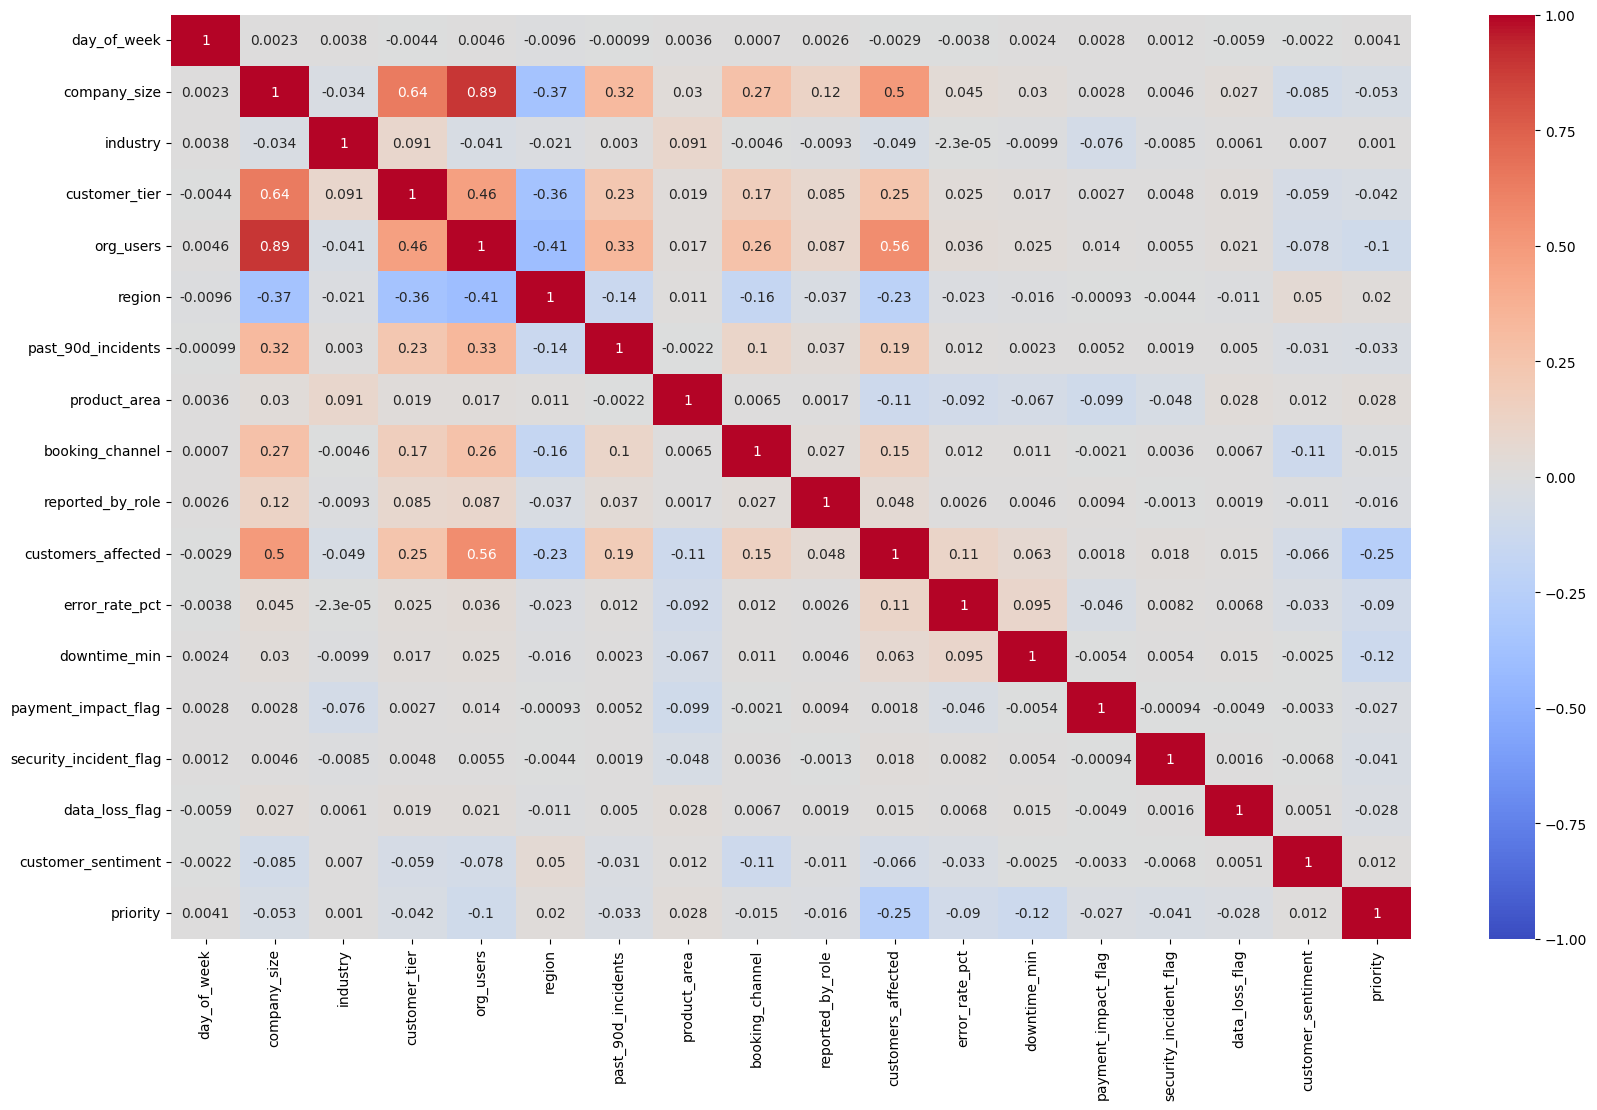

In [59]:
plt.figure(figsize=(20,12))
sns.heatmap(final_data.corr(), annot=True, vmin=-1, cmap='coolwarm')
plt.show()

In [60]:
from xgboost import XGBClassifier #pip install xgboost
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [61]:
# Feature importance
X = final_data.drop(columns=["priority"])
y = final_data['priority']

In [62]:
#get train and test splits
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [64]:
# Base XGBoost Model
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1, #eta
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

In [65]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [67]:
# Model Evaluation (Before Tuning)
y_pred = xgb_model.predict(X_test)

In [68]:
print("\n--- BASE MODEL PERFORMANCE ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


--- BASE MODEL PERFORMANCE ---
Accuracy: 0.9199333333333334

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.83      0.89      2250
         1.0       0.95      0.96      0.95      7500
         2.0       0.87      0.90      0.89      5250

    accuracy                           0.92     15000
   macro avg       0.92      0.90      0.91     15000
weighted avg       0.92      0.92      0.92     15000


Confusion Matrix:
 [[1875    0  375]
 [   0 7177  323]
 [  88  415 4747]]


In [77]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 80],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [78]:
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)

In [79]:
grid_search.fit(X_train, y_train)

print("\nBest Parameters Found:")
print(grid_search.best_params_)


Best Parameters Found:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 80, 'subsample': 0.8}


In [80]:
# Train Best Tuned Model
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)

print("\n--- TUNED MODEL PERFORMANCE ---")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


--- TUNED MODEL PERFORMANCE ---
Accuracy: 0.94

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.88      0.92      2250
         1.0       0.96      0.97      0.96      7500
         2.0       0.90      0.93      0.92      5250

    accuracy                           0.94     15000
   macro avg       0.94      0.92      0.93     15000
weighted avg       0.94      0.94      0.94     15000


Confusion Matrix:
 [[1976    0  274]
 [   0 7259  241]
 [  71  314 4865]]


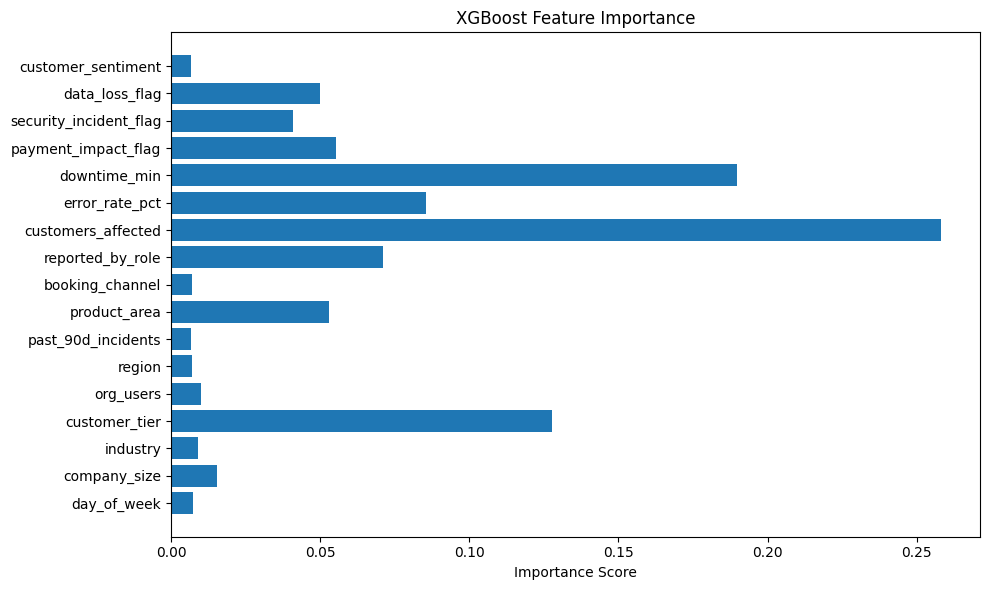

In [75]:
# Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, best_model.feature_importances_)
plt.xlabel("Importance Score")
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()

In [81]:
# Future Predictions (New / Unseen Data)
new_data = X_test.iloc[:10]

future_predictions = best_model.predict(new_data)
future_probabilities = best_model.predict_proba(new_data)

print("\n--- FUTURE PREDICTIONS ---")
print("Predicted Class:", future_predictions)
print("Prediction Probabilities:\n", future_probabilities)


--- FUTURE PREDICTIONS ---
Predicted Class: [1 2 1 1 2 1 1 2 1 2]
Prediction Probabilities:
 [[9.20118357e-04 9.50829744e-01 4.82501723e-02]
 [2.61905864e-02 5.22757657e-02 9.21533585e-01]
 [1.75340229e-03 8.76391590e-01 1.21855006e-01]
 [1.09492161e-03 9.96908963e-01 1.99607597e-03]
 [9.18203816e-02 2.06114985e-02 8.87568116e-01]
 [1.19727422e-02 5.44143438e-01 4.43883836e-01]
 [6.69433968e-04 9.94156003e-01 5.17455349e-03]
 [1.19662553e-01 2.06491575e-02 8.59688282e-01]
 [5.08201891e-04 9.90018487e-01 9.47330985e-03]
 [4.19937372e-01 3.81432776e-03 5.76248288e-01]]
